In [119]:
import numpy as np
import cv2
import ImageView as iv
import eksplisitt as eks
import matplotlib.pyplot as plt
%matplotlib inline

lena = 'lena.png'
LFC = 'LFC.jpeg'

def detectFace(file, title):
    """
    Oppdager et ansikt vendt mot kamera
   
    Parameters
    ---------
    file         : Bildefil
                    Pathen til filen der original bildet befinner seg uten andvending
    scaleFactor  : int
                    Kompenserer i tilfelle noen ansikter er nærmere kamera enn andre
    minNeighbors : int
                    spesifiserer antall naboer en rektangel bør ha for å bli kalt et "ansikt"
    title        : text
                    Tittelen på bildet som er anvendt
    """
    image = cv2.imread(file) #leser inn bildet
    def toRGB(image): #open CV laster bilder i BGR. Konverterer til RGB
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #returnerer bildet konvertert til RGB
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #importerer haarscade biblioteket
    faces = face_cascade.detectMultiScale(image, scaleFactor = 1.5, minNeighbors = 5, minSize = (30,30))
    
    for (x,y,w,h) in faces:
        ROI = image[y:y+h ,x:x+w]                       #Region of Interest --> ansiktet
        blur = cv2.blur(ROI,(30,30))                    #blurrer området som er definert som ansikt
        image[y:y+h ,x:x+w] = blur                      #legger det blurry området oppå originalbildet
    print("Antall ansikt er", len(faces))               #teller opp antall ansikt funnet og skriver de ut
        
    iv.singleView(toRGB(image),title)                   #displayer bildet

Antall ansikt er 1


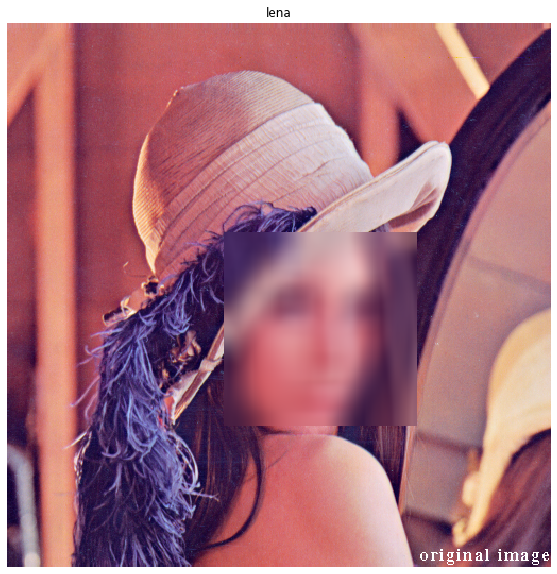

In [120]:
detectFace(lena, "lena")

Antall ansikt er 5


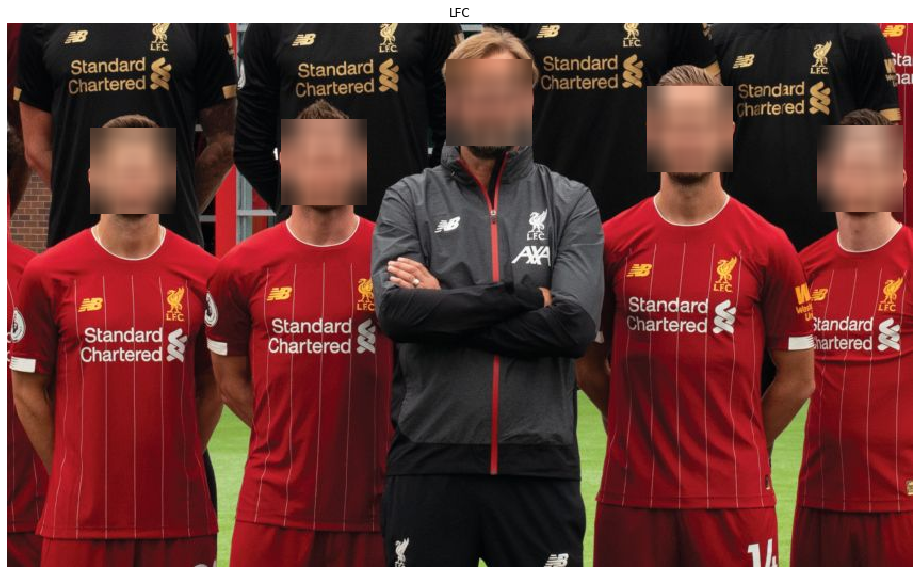

In [121]:
detectFace(LFC, "LFC")